In [1]:
import re
import nltk
import random

In [2]:
from nltk.tokenize import RegexpTokenizer

In [3]:
nltk.download('gutenberg')

[nltk_data] Error loading gutenberg: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [4]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [5]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [6]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

# Here we choose 6 books with different authors.

In [7]:
books=["austen-emma.txt",
"bryant-stories.txt",
"chesterton-thursday.txt",
"edgeworth-parents.txt",
"milton-paradise.txt",
"melville-moby_dick.txt"]

# Data preprocessing and cleansing

In [8]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [9]:
print(lst_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Collecting samples, removing punctuations and stopwords, stemming and lemmatisation, labeling.

In [10]:
sample_set=[]

for k, book in enumerate(books):
    
    text = nltk.corpus.gutenberg.raw(book)
    # The following three steps must be taken so that words like "Dr.", "Mary's", "_mother_" can be processed properly.
    text=" '".join(text.split("'"))
    text=" .".join(text.split("."))
    text=" ".join(text.split("_"))
    
    # Remove punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_word=tokenizer.tokenize(text)
    #tokenized_word=nltk.word_tokenize(text)
    
    lst_text = [word for word in tokenized_word if word not in 
                    lst_stopwords]
    
    ## Stemming (remove -ing, -ly, ...)
    
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
    
    print(book)
    print("size before removing stopwords: ", len(tokenized_word))
    print("size after removing stopwords: ", len(lst_text))
    
    
    doc = "" # empty segment
    chunked_docs=[] # set of segments

    
    for i, word in enumerate(lst_text,1): # note that i starts from 1 here

        doc = doc + " " + word 
        if i%100==0: # note that i starts from 1 as we illustrate before
            chunked_docs.append((doc, k)) # labeling the segment
            doc = ""

    # verify if each sample contains 100 words
    count=0
    for i in range(len(chunked_docs)):
        tokenized_chunked_docs=tokenizer.tokenize(chunked_docs[i][0])
        if len(tokenized_chunked_docs)!=100:
            count+=1
    print("number of samples that are not 100 words: ", count)
    print("")

    index=[] # used for recording indices that have been used. 
    samples=[]
    for i in range(0,200):
        idx=random.randint(0,len(chunked_docs)-1)
        while idx in index: # continue to get a index that has not been used before
            idx=random.randint(0,len(chunked_docs)-1)
        index.append(idx)
        samples.append(chunked_docs[idx])
    
    sample_set+=samples

austen-emma.txt
size before removing stopwords:  161980
size after removing stopwords:  81613
number of samples that are not 100 words:  0

bryant-stories.txt
size before removing stopwords:  46699
size after removing stopwords:  24538
number of samples that are not 100 words:  0

chesterton-thursday.txt
size before removing stopwords:  58729
size after removing stopwords:  31640
number of samples that are not 100 words:  0

edgeworth-parents.txt
size before removing stopwords:  170799
size after removing stopwords:  87219
number of samples that are not 100 words:  0

milton-paradise.txt
size before removing stopwords:  80497
size after removing stopwords:  52975
number of samples that are not 100 words:  0

melville-moby_dick.txt
size before removing stopwords:  218619
size after removing stopwords:  119078
number of samples that are not 100 words:  0



In [11]:
len(sample_set)

1200

In [12]:
print(sample_set[0])

(' snow time said word lest make mr woodhous uncomfort excus hurri away a quantiti snow fallen like fall imped return mere joke afraid would find difficulti he wish road might impass might abl keep randal utmost good sure accommod might found everi bodi call wife agre littl contriv everi bodi might lodg hardli knew conscious two spare room hous what done dear emma done mr woodhous first exclam could say time to look comfort assur safeti represent excel hors jame mani friend reviv littl hi eldest daughter alarm equal the horror block randal child hartfield full imagin fanci road passabl', 0)


In [13]:
features=[]
targets=[]
for i in sample_set:
    features.append(i[0])
    targets.append(i[1])

In [14]:
#!pip install wordcloud

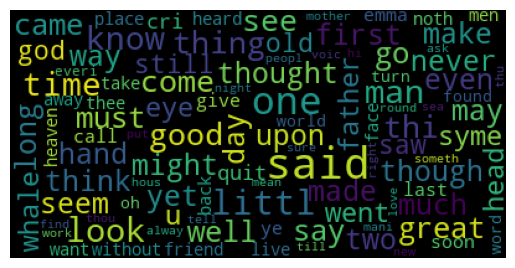

In [15]:
# Visualization:
import wordcloud
import matplotlib.pyplot as plt
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(sample_set))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()
print('\n')

# Splitting the dataset into training and testing variables

In [16]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=20, stratify=targets)

# Feature engineering

# BOW

In [17]:
# Transformation BOW 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [18]:
X_train_counts.shape

(840, 8522)

# n-gram

In [19]:
# n-gram Count Vectorization
count_vect_gram = CountVectorizer(ngram_range = (1, 2))
X_train_counts_gram = count_vect.fit_transform(X_train)
X_train_counts_gram.shape
print(X_train_counts_gram.shape)


(840, 8522)


# TF-IDF

In [20]:
# TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(840, 8522)

# n-gram TF-IDF

In [21]:
# n-gram TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_gram = TfidfVectorizer(use_idf=True, ngram_range = (1, 2)) 
X_train_tfidf_gram = tfidf_vectorizer_gram.fit_transform(X_train)
X_train_tfidf_gram.shape
print(X_train_tfidf_gram.shape)

(840, 78706)


# For the following models, we first feed them with tf-idf data and leave n-gram parameter for GridSearchCV to decide.

# Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [23]:
X_new_counts = count_vect.transform(X_test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [24]:
predicted = clf.predict(X_new_tfidf)

In [25]:
import numpy as np
np.mean(predicted == y_test)

0.9527777777777777

# Upgrade to pipeline 

In [26]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

# Accuracy

In [27]:
predicted = text_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.9527777777777777


# Parameter fine-tuning: GridSearchCV (10-fold)

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
}
gs_clf = GridSearchCV(text_clf, parameters, cv=10, n_jobs=-1)

gs_clf = gs_clf.fit(X_train, y_train)

predicted=gs_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))
print("best score: ", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

accuracy:  0.9611111111111111
best score:  0.9690476190476189
tfidf__use_idf: True
vect__ngram_range: (1, 2)


# Evaluation: classification report

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
   target_names=books))

                         precision    recall  f1-score   support

        austen-emma.txt       0.94      1.00      0.97        60
     bryant-stories.txt       1.00      0.95      0.97        60
chesterton-thursday.txt       0.94      1.00      0.97        60
  edgeworth-parents.txt       0.97      0.95      0.96        60
    milton-paradise.txt       0.94      1.00      0.97        60
 melville-moby_dick.txt       1.00      0.87      0.93        60

               accuracy                           0.96       360
              macro avg       0.96      0.96      0.96       360
           weighted avg       0.96      0.96      0.96       360



# Evaluation: confusion matrix

In [30]:
metrics.confusion_matrix(y_test, predicted)

array([[60,  0,  0,  0,  0,  0],
       [ 1, 57,  1,  0,  1,  0],
       [ 0,  0, 60,  0,  0,  0],
       [ 3,  0,  0, 57,  0,  0],
       [ 0,  0,  0,  0, 60,  0],
       [ 0,  0,  3,  2,  3, 52]], dtype=int64)

In [31]:
metric_index=[]
metric_value=[]

# Save metrics for visualization later

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
metric = [accuracy_score(y_test, predicted), precision_score(y_test, predicted, average='weighted'), 
              recall_score(y_test, predicted, average='weighted'), f1_score(y_test, predicted, average='weighted')]

metric_index.append("NB")
metric_value.append(metric)

# For the rest of the models, we do not show sub-headings for each specific step.

# SGD

In [33]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [34]:
predicted = text_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.975


In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__alpha': (1e-2, 1e-3),
}
gs_clf = GridSearchCV(text_clf, parameters, cv=10, n_jobs=-1)

gs_clf = gs_clf.fit(X_train, y_train)

predicted=gs_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))
print("best score: ", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

accuracy:  0.975
best score:  0.9928571428571429
clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
   target_names=books))

                         precision    recall  f1-score   support

        austen-emma.txt       1.00      0.98      0.99        60
     bryant-stories.txt       0.98      0.97      0.97        60
chesterton-thursday.txt       0.98      1.00      0.99        60
  edgeworth-parents.txt       0.97      1.00      0.98        60
    milton-paradise.txt       0.94      1.00      0.97        60
 melville-moby_dick.txt       0.98      0.90      0.94        60

               accuracy                           0.97       360
              macro avg       0.98      0.98      0.97       360
           weighted avg       0.98      0.97      0.97       360



In [37]:
metrics.confusion_matrix(y_test, predicted)

array([[59,  1,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  1,  1],
       [ 0,  0, 60,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0],
       [ 0,  0,  0,  0, 60,  0],
       [ 0,  0,  1,  2,  3, 54]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
metric = [accuracy_score(y_test, predicted), precision_score(y_test, predicted, average='weighted'), 
              recall_score(y_test, predicted, average='weighted'), f1_score(y_test, predicted, average='weighted')]

metric_index.append("SGD")
metric_value.append(metric)

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5)),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])

In [40]:
predicted = text_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.95


In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__n_neighbors': [3,5,7,9],
}
gs_clf = GridSearchCV(text_clf, parameters, cv=10, n_jobs=-1)

gs_clf = gs_clf.fit(X_train, y_train)

predicted=gs_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))
print("best score: ", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

accuracy:  0.9472222222222222
best score:  0.9571428571428571
clf__n_neighbors: 3
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
   target_names=books))

                         precision    recall  f1-score   support

        austen-emma.txt       0.94      0.98      0.96        60
     bryant-stories.txt       0.84      0.98      0.91        60
chesterton-thursday.txt       0.98      0.95      0.97        60
  edgeworth-parents.txt       1.00      1.00      1.00        60
    milton-paradise.txt       0.95      0.97      0.96        60
 melville-moby_dick.txt       1.00      0.80      0.89        60

               accuracy                           0.95       360
              macro avg       0.95      0.95      0.95       360
           weighted avg       0.95      0.95      0.95       360



In [43]:
metrics.confusion_matrix(y_test, predicted)

array([[59,  1,  0,  0,  0,  0],
       [ 1, 59,  0,  0,  0,  0],
       [ 1,  2, 57,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0],
       [ 0,  2,  0,  0, 58,  0],
       [ 2,  6,  1,  0,  3, 48]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
metric = [accuracy_score(y_test, predicted), precision_score(y_test, predicted, average='weighted'), 
              recall_score(y_test, predicted, average='weighted'), f1_score(y_test, predicted, average='weighted')]

metric_index.append("KNN")
metric_value.append(metric)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators = 50, random_state = 0)),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

In [46]:
predicted = text_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.9111111111111111


In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__n_estimators': [25, 50, 75, 100],
}
gs_clf = GridSearchCV(text_clf, parameters, cv=10, n_jobs=-1)

gs_clf = gs_clf.fit(X_train, y_train)

predicted=gs_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))
print("best score: ", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

accuracy:  0.9472222222222222
best score:  0.9416666666666667
clf__n_estimators: 100
tfidf__use_idf: False
vect__ngram_range: (1, 1)


In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
   target_names=books))

                         precision    recall  f1-score   support

        austen-emma.txt       0.98      1.00      0.99        60
     bryant-stories.txt       0.95      0.92      0.93        60
chesterton-thursday.txt       0.98      0.97      0.97        60
  edgeworth-parents.txt       0.90      0.95      0.93        60
    milton-paradise.txt       0.90      1.00      0.94        60
 melville-moby_dick.txt       0.98      0.85      0.91        60

               accuracy                           0.95       360
              macro avg       0.95      0.95      0.95       360
           weighted avg       0.95      0.95      0.95       360



In [49]:
metrics.confusion_matrix(y_test, predicted)

array([[60,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  1,  3,  1],
       [ 0,  0, 58,  2,  0,  0],
       [ 1,  1,  1, 57,  0,  0],
       [ 0,  0,  0,  0, 60,  0],
       [ 0,  2,  0,  3,  4, 51]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
metric = [accuracy_score(y_test, predicted), precision_score(y_test, predicted, average='weighted'), 
              recall_score(y_test, predicted, average='weighted'), f1_score(y_test, predicted, average='weighted')]

metric_index.append("RF")
metric_value.append(metric)

# XGBoost

In [51]:
import xgboost as xgb

In [52]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', xgb.XGBClassifier()),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [53]:
predicted = text_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.9027777777777778


In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'tfidf__use_idf': (True, False),
}
gs_clf = GridSearchCV(text_clf, parameters, cv=10, n_jobs=-1)

gs_clf = gs_clf.fit(X_train, y_train)

predicted=gs_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))
print("best score: ", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

accuracy:  0.9
best score:  0.8916666666666666
tfidf__use_idf: False


In [55]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
   target_names=books))

                         precision    recall  f1-score   support

        austen-emma.txt       0.95      0.97      0.96        60
     bryant-stories.txt       0.87      0.80      0.83        60
chesterton-thursday.txt       0.96      0.92      0.94        60
  edgeworth-parents.txt       0.74      0.87      0.80        60
    milton-paradise.txt       0.92      0.98      0.95        60
 melville-moby_dick.txt       0.98      0.87      0.92        60

               accuracy                           0.90       360
              macro avg       0.91      0.90      0.90       360
           weighted avg       0.91      0.90      0.90       360



In [56]:
metrics.confusion_matrix(y_test, predicted)

array([[58,  0,  0,  1,  1,  0],
       [ 0, 48,  1,  7,  3,  1],
       [ 0,  0, 55,  5,  0,  0],
       [ 2,  6,  0, 52,  0,  0],
       [ 1,  0,  0,  0, 59,  0],
       [ 0,  1,  1,  5,  1, 52]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
metric = [accuracy_score(y_test, predicted), precision_score(y_test, predicted, average='weighted'), 
              recall_score(y_test, predicted, average='weighted'), f1_score(y_test, predicted, average='weighted')]

metric_index.append("XGB")
metric_value.append(metric)

# SVM

In [58]:
from sklearn.svm import SVC

In [59]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(gamma=0.1, random_state=0))])

In [60]:
predicted = text_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))

accuracy:  0.9527777777777777


In [61]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__kernel': ['poly', 'rbf', 'sigmoid'],
}
gs_clf = GridSearchCV(text_clf, parameters, cv=10, n_jobs=-1)

gs_clf = gs_clf.fit(X_train, y_train)

predicted=gs_clf.predict(X_test)
print("accuracy: ", np.mean(predicted == y_test))
print("best score: ", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
  print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

accuracy:  0.9611111111111111
best score:  0.9714285714285713
clf__kernel: 'rbf'
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
   target_names=books))

                         precision    recall  f1-score   support

        austen-emma.txt       1.00      0.98      0.99        60
     bryant-stories.txt       1.00      0.90      0.95        60
chesterton-thursday.txt       0.97      1.00      0.98        60
  edgeworth-parents.txt       0.90      1.00      0.94        60
    milton-paradise.txt       0.92      1.00      0.96        60
 melville-moby_dick.txt       1.00      0.88      0.94        60

               accuracy                           0.96       360
              macro avg       0.96      0.96      0.96       360
           weighted avg       0.96      0.96      0.96       360



In [63]:
metrics.confusion_matrix(y_test, predicted)

array([[59,  0,  0,  1,  0,  0],
       [ 0, 54,  1,  3,  2,  0],
       [ 0,  0, 60,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0],
       [ 0,  0,  0,  0, 60,  0],
       [ 0,  0,  1,  3,  3, 53]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
metric = [accuracy_score(y_test, predicted), precision_score(y_test, predicted, average='weighted'), 
              recall_score(y_test, predicted, average='weighted'), f1_score(y_test, predicted, average='weighted')]

metric_index.append("SVC")
metric_value.append(metric)

# Visualization

In [65]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'acc')

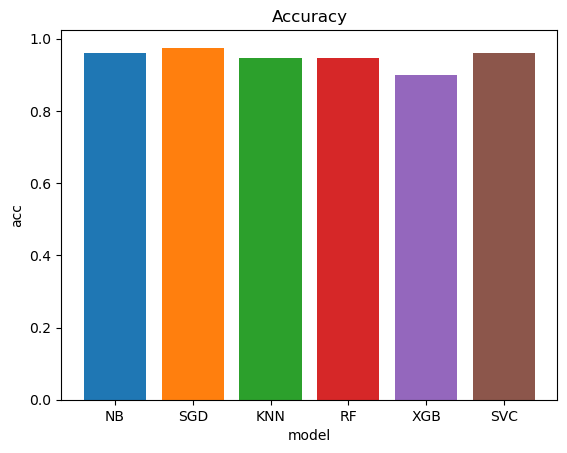

In [66]:
for i in range(len(metric_value)):
    plt.bar(metric_index[i], metric_value[i][0])

plt.title("Accuracy")
plt.xlabel("model")
plt.ylabel("acc")

Text(0, 0.5, 'pre')

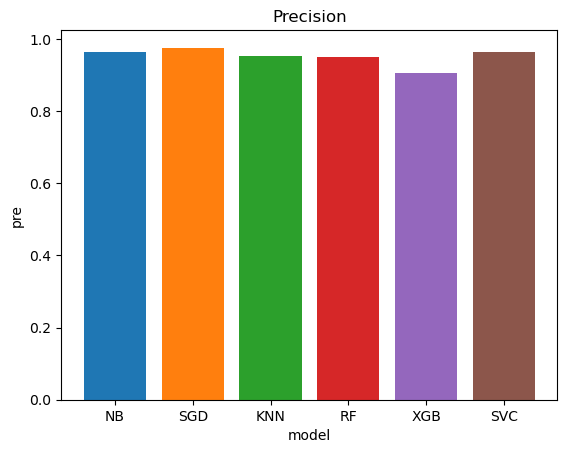

In [67]:
for i in range(len(metric_value)):
    plt.bar(metric_index[i], metric_value[i][1])

plt.title("Precision")
plt.xlabel("model")
plt.ylabel("pre")

Text(0, 0.5, 'rec')

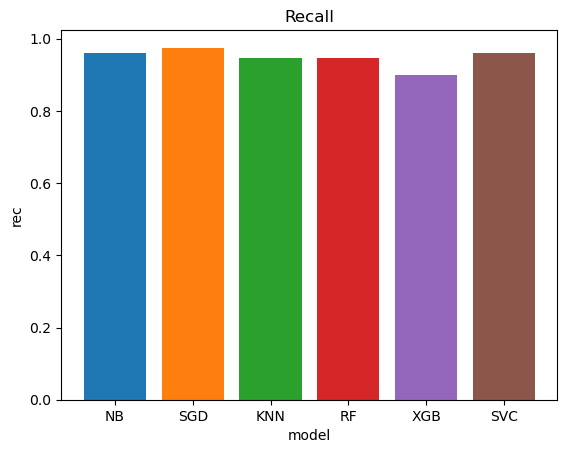

In [68]:
for i in range(len(metric_value)):
    plt.bar(metric_index[i], metric_value[i][2])

plt.title("Recall")
plt.xlabel("model")
plt.ylabel("rec")

Text(0, 0.5, 'f1')

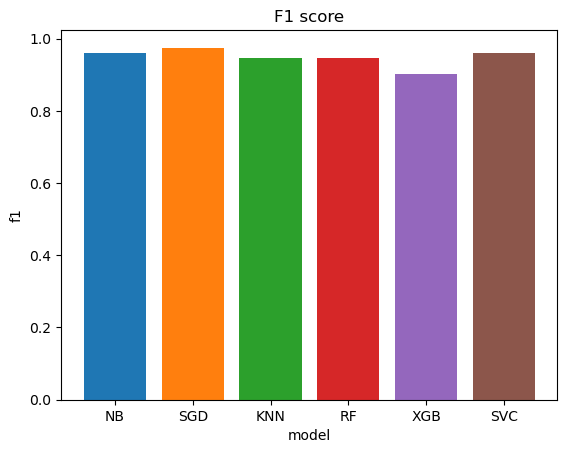

In [69]:
for i in range(len(metric_value)):
    plt.bar(metric_index[i], metric_value[i][3])

plt.title("F1 score")
plt.xlabel("model")
plt.ylabel("f1")

# In conclusion, generally SGD is the best model (with the use of idf and without the use of 2-gram).

# Error Analysis

# Although all models perform fairly good on our dataset, minor errors might appear, primarily due to varied distributions of word frequencies among samples. Plus, insufficient training set size may also contribute to the lower accuracy. Moreover, lost of information might occur during data preprocessing and cleansing steps, resulting in errors when predicting.

# Analysis of Bias and Variability

# In terms of bias, all of our models can closely fit the training data, contributing to the low bias.
# When it comes to variability, by changing the training data we do not see significant change of the model, so the variability is not notable.

# Now we show how our best model can tell the author given a text segment.

In [70]:
text = nltk.corpus.gutenberg.raw("austen-emma.txt")

In [71]:
def text_preprocess(text):
    text=" '".join(text.split("'"))
    text=" .".join(text.split("."))
    text=" ".join(text.split("_"))

    # Remove punctuations
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_word=tokenizer.tokenize(text)
    #tokenized_word=nltk.word_tokenize(text)

    tokenized_word=tokenized_word[1:-1] # delete truncated words

    lst_text = [word for word in tokenized_word if word not in 
                    lst_stopwords]

    ## Stemming (remove -ing, -ly, ...)

    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]

    ## Lemmatisation (convert the word into root word)

    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]

    doc=""

    for word in lst_text:
        doc=doc+" "+word
    
    return doc

# rebuild the best model

In [72]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

#Training
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

# Get a segment from the text, note that the segment can be any, below is just one of the examples.

In [73]:
print(text[500:1000])

oo long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o


In [74]:
result=text_clf.predict([text_preprocess(text[500:1000])])

In [75]:
print("The author of the book is: ", books[result[0]].split("-")[0])

The author of the book is:  austen
